By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/22

Videos:
* [[10分鐘搞懂機器學習] 4.6 Python實作 精確召回曲線Precision-Recall (PR) Curve](https://youtu.be/az9RCppliWI?si=sYIMeM2gg3F5XtpI)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


將眾多手寫數字圖片分為兩類，一類為數字為x (1,陽性)，另一類為數字不是x (0,陰性)


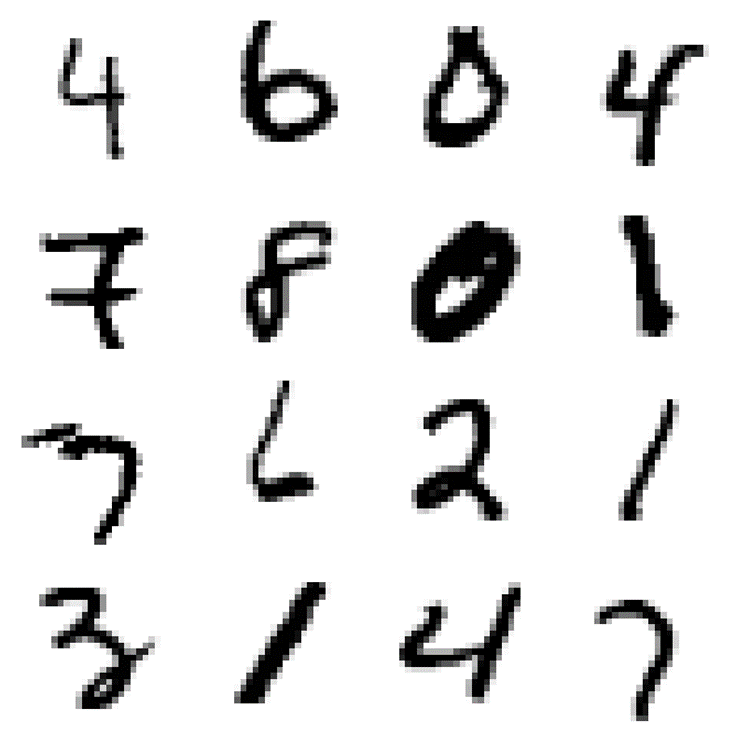

In [ ]:
# 首次程式撰寫，可在ChatGPT使用提示詞:使用Scikit-Learn載入MNIST資料，將20%的資料作為測試，80%作為訓練
# 加載SGDClassifier範例中的變數
from google.colab import drive
import pickle

# 连接到Google Drive
drive.mount('/content/drive')

# 加载变量
with open('/content/drive/My Drive/ML/variables2_2.pkl', 'rb') as f:
    variables = pickle.load(f)

from sklearn.model_selection import train_test_split
# 从变量字典中获取特定变量
X = variables['X']
y = variables['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_binary=(y_train==2)


# 建立 SGD 分類器
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss='log_loss', alpha=0.001, max_iter=1000, random_state=42)

# 訓練 SGD 分類器
sgd_classifier.fit(X_train, y_binary)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

In [ ]:
# prompt: python code, y_binary實際標籤，X_train 訓練集，已訓練好的分類模型是sgd_classifier，計算confusion matrix、準確率、精確率、召回率、F1值
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming y_pred contains the predicted labels by your SGD classifier
y_pred = sgd_classifier.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_binary, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_binary, y_pred)

# Calculate precision
precision = precision_score(y_binary, y_pred)

# Calculate recall
recall = recall_score(y_binary, y_pred)

# Calculate F1 score
f1 = f1_score(y_binary, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[49802   588]
 [  758  4852]]
Accuracy: 0.9759642857142857
Precision: 0.8919117647058824
Recall: 0.8648841354723708
F1 Score: 0.8781900452488688


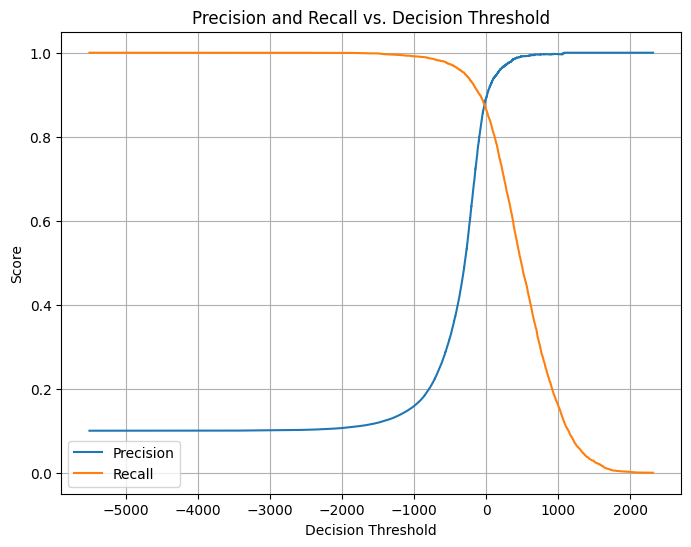

In [ ]:
# prompt:  y_binary實際標籤，X_train 訓練集，已訓練好的分類模型是sgd_classifier，利用decision score，畫 精确度(precision)、召回率(recall) versus decision threshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 获取模型的决策得分
decision_scores = sgd_classifier.decision_function(X_train)

# 计算精确度和召回率
precisions, recalls, thresholds = precision_recall_curve(y_binary, decision_scores)

# 绘制精确度和召回率与决策阈值的关系图
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.title('Precision and Recall vs. Decision Threshold')
plt.show()

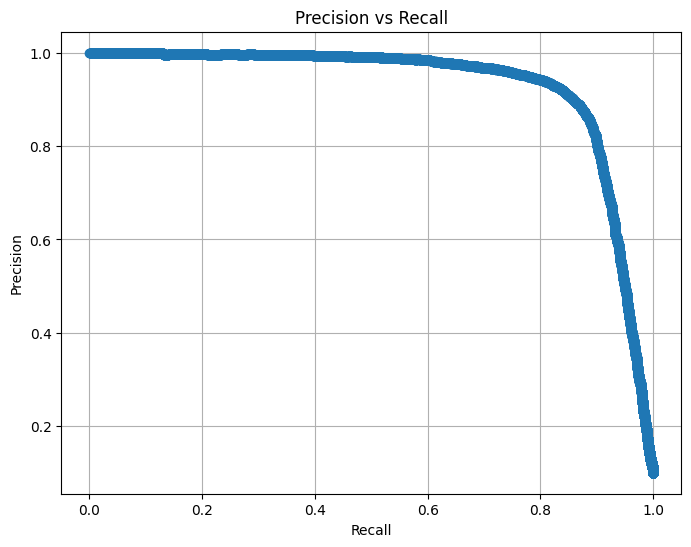

In [ ]:
# prompt 畫圖 精确度(precision) vs 召回率(recall)
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.grid(True)
plt.show()



In [ ]:
# prompt:在精确度(precision) vs 召回率(recall)圖裡，選定recall=0.9，回傳對應的threshold
# 选择 recall=0.9 对应的阈值
target_recall = 0.9
index = next(i for i, value in enumerate(recalls) if value >= target_recall)
threshold_for_target_recall = thresholds[index]

print("Threshold for recall={}: {}".format(target_recall, threshold_for_target_recall))

Threshold for recall=0.9: -5507.2965704889175


In [ ]:
# prompt:在精确度(precision) vs 召回率(recall)圖裡，選定precision=0.85，回傳對應的threshold
# 选择 precision=0.85 对应的阈值
target_precision = 0.85
index = next(i for i, value in enumerate(precisions) if value >= target_precision)
threshold_for_target_precision = thresholds[index]

print("Threshold for precision={}: {}".format(target_precision, threshold_for_target_precision))

Threshold for precision=0.85: -53.78517896345146
